In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv("height-weight_new.csv")

In [108]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

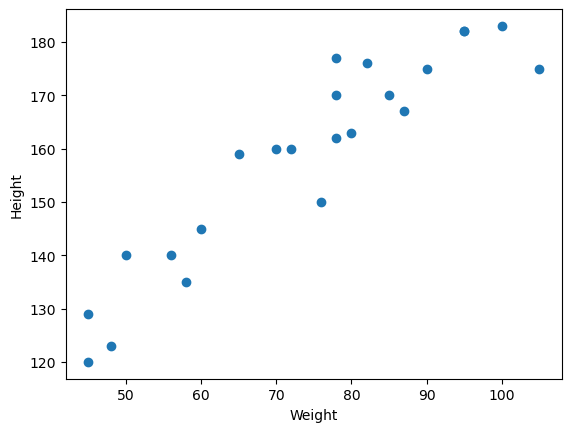

In [109]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [110]:
## divide our dataset into independent and dependent features
X=df[["Weight"]] #independent
y=df["Height"]   # dependent

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [112]:
X_train.shape,X_test.shape


((18, 1), (5, 1))

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [114]:
X_train_scaled

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [115]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [116]:
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)

In [117]:
print("The slope or coefficient of weight is",linreg.coef_)
print("Intercept",linreg.intercept_)

The slope or coefficient of weight is [17.03440872]
Intercept 157.5


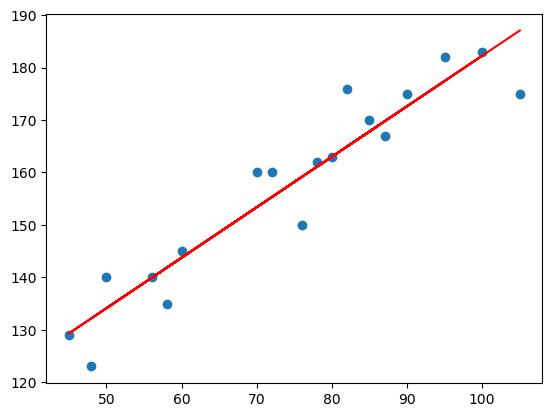

In [123]:
plt.scatter(X_train,y_train)
plt.plot(X_train,linreg.predict(X_train_scaled),"r")

In [124]:
y_pred_test=linreg.predict(X_test_scaled)

In [126]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

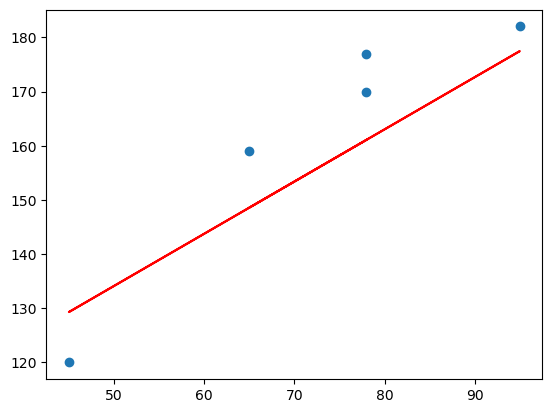

In [129]:
plt.scatter(X_test,y_test)
plt.plot(X_test,linreg.predict(X_test_scaled),"r")

## Performane Metrics
## MSE,MAE,RMSE
## R square and Adjusted R square
 


In [130]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [131]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [134]:
score=r2_score(y_test,y_pred)
score

0.776986986042344

## Adjusted R square

Adjusted R2= 1-[(1-R2)*(n-1)/(n-k-1)]

Where:

R2:The R2 of the model n:The number of observation k:The number of predictor variable

In [136]:
## Adjusted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [139]:
## new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [143]:
print("The Height prediction for weight 80 kg is :",linreg.predict(scaled_weight))

The Height prediction for weight 80 kg is : [163.01076266]


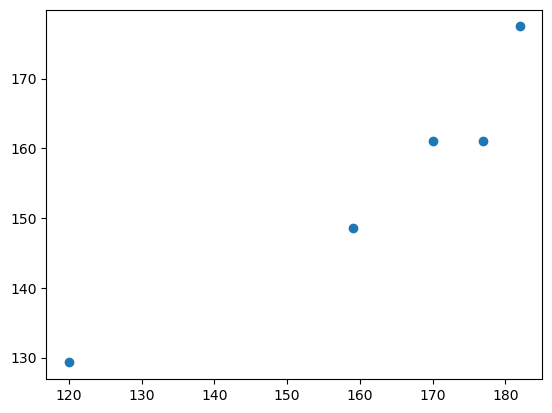

In [144]:
## Assumption
## plot a scatter plot for the predction
plt.scatter(y_test,y_pred_test)

In [145]:
## Residuals

residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

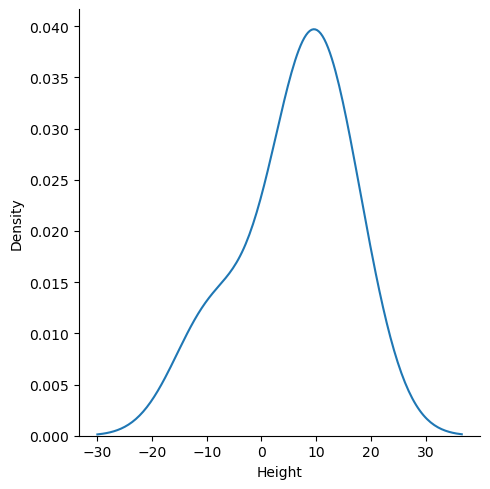

In [156]:
## plot the residuals
sns.displot(residuals,kind='kde')


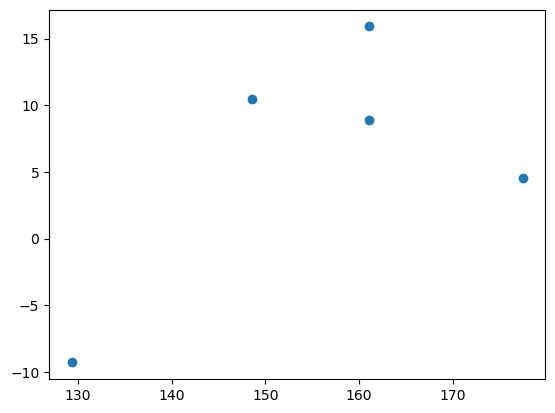

In [157]:
## scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)